In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#from random import random, seed

In [2]:
#seed(8765309)

In [3]:
A = np.array([[-9,1,2],
              [1,-11,3],
              [4,3,-17]])

Ad = 1e-2 * np.array([[1,2,3],
                      [4,5,6],
                      [7,8,9]])

B = np.array([[1],
              [2],
              [3]])

C = np.array([[1,0,0]])

D = np.array([[3],
              [1],
              [0]])

F = np.array([[0,1,0],
              [0,0,1]])

G = np.array([[0.3333],
             [0]])
H = np.array([[1.6667],
              [3]])

N = np.array([[-11.3333,2.3333],
              [3, -17]])
Nd = np.array([[0.0433,0.05],
               [0.08,0.09]])
J = np.array([[0.2222],
              [5]])
Jd = np.array([[0.0511],
               [0.0967]])

In [4]:
R = np.dot(G,C)
RA = np.dot(R,A)
RAd = np.dot(R,Ad);
RB = np.dot(R,B)
RD = np.dot(R,D)
NR = np.dot(N,R)
NdR = np.dot(Nd,R)
JC = np.dot(J,C)
JdC = np.dot(Jd,C)

In [5]:
t = np.arange(0,20, 0.001)

In [6]:
np.shape(t)

(20000,)

In [7]:
simLen = np.shape(t)[0]

In [8]:
simLen

20000

In [9]:
tau = 1000

In [10]:
x = np.zeros((3, simLen))
xdot = np.zeros((3, simLen))
x[0,0:tau+1] = 1
x[1,0:tau+1] = 0.4
x[2,0:tau+1] = 2

In [11]:
zhat = np.zeros((2, simLen))
zhdot = np.zeros((2, simLen))
u = 1
#np.random.seed(seed=1000)

In [12]:
for i in range(tau, simLen):
    xdot[:,i]= (np.dot(A, (x[:,i]).reshape(3,1)) + np.dot(Ad, (x[:, i-tau]).reshape(3,1)) + B*u + D*(np.random.randint(5))).reshape(3,)
    if (i != simLen-1):
        x[:,i+1] = x[:,i] + 0.001*xdot[:,i]

In [13]:
y = np.dot(C,x)

In [14]:
for i in range(tau, simLen):
    zhdot[:,i] = (np.dot(N, (zhat[:,i]).reshape(2,1)) + np.dot(Nd, (zhat[:,i-tau]).reshape(2,1)) + np.dot((JC + RA - NR), (x[:, i]).reshape(3,1)) + np.dot((JdC + RAd - NdR), (x[:, i-tau]).reshape(3,1)) + (H + RB)*u + RD*(np.random.randint(5))).reshape(2,)
    if (i != simLen - 1):
        zhat[:,i+1] = zhat[:,i] + 0.001*zhdot[:,i]

In [15]:
z = np.dot(F, x)

In [16]:
e = np.abs(zhat - z)

In [17]:
#fig1 = plt.figure(1)
#ax1, ax2 = fig1.add_subplot(211), fig1.add_subplot(212)
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig1.text(0.47, 0.03, 'time (s)', ha='center', va='center')
fig1.text(0.02, 0.5, 'Magnitude', ha='center', va='center', rotation='vertical')
#fig1.text(0.06, 0.5, 'Magnitude', ha='center', va='center', rotation='vertical')
ax1.set_title('Example 1a: state and PUILFO dynamics with unknown inputs')
ax2.set_title('error convergence')


line1, = ax1.plot(t[0:7999], z[0, 0:7999], 'b-', linewidth=1.5, label='$x_2(t)$')
line2, = ax1.plot(t[0:7999], zhat[0, 0:7999], 'r--', linewidth=1.5, label='$\hat{z}_1(t)$')
line1.set_antialiased(True)
line2.set_antialiased(True)
ax1.set_ylim(0, 1.5)

ax1.legend(handles=[line1, line2], loc='upper right')

errline, = ax2.plot(t[0:7999], e[0, 0:7999],'g-', linewidth=1.5, label='$e(t)$')
errline.set_antialiased(True)
plt.ylim(0, 1.0)
ax2.legend(handles=[errline], loc='upper right')


In [18]:
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [19]:
plt.savefig('Example1a.eps', dpi=100)

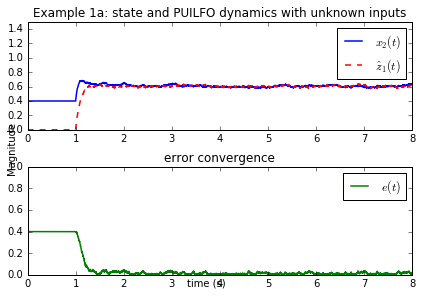

In [20]:
plt.show()

In [21]:
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
#fig1.suptitle('Example 1b', fontsize=10, fontweight='bold')
fig1.text(0.47, 0.03, 'time (s)', ha='center', va='center')
fig1.text(0.02, 0.5, 'Magnitude', ha='center', va='center', rotation='vertical')
ax1.set_title('Example 1b: estimating state without unknown inputs')
ax2.set_title('error convergence')


line1, = ax1.plot(t[0:7999], z[1, 0:7999], 'b-', linewidth=1.5, label='$x_3(t)$')
line2, = ax1.plot(t[0:7999], zhat[1, 0:7999], 'r--', linewidth=1.5, label='$\hat{z}_2(t)$')
line1.set_antialiased(True)
line2.set_antialiased(True)
ax1.set_ylim(0, 1.5)

ax1.legend(handles=[line1, line2], loc='upper right')

errline, = ax2.plot(t[0:7999], e[1, 0:7999],'g-', linewidth=1.5, label='$e(t)$')
errline.set_antialiased(True)
plt.ylim(0, 1.0)
ax2.legend(handles=[errline], loc='upper right')


In [22]:
plt.tight_layout()

In [23]:
plt.savefig('Example1b.eps', dpi=600)

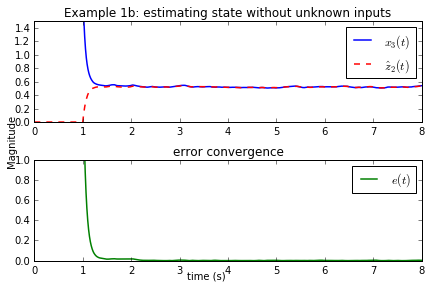

In [24]:
plt.show()